Step 1/2:

Gets everything ready

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor 

enc = LabelEncoder()


df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [2]:
df=df.replace(r'^\s*$', np.nan, regex=True)
df.dropna(inplace=True,axis=0)
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Step 3:

Extracts features

In [5]:
df1=df.copy()

df1 = df1.drop(['region','Date','Unnamed: 0'], axis=1)
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018


In [6]:
Xprep = df1.copy()
Xprep = df1.drop(['AveragePrice'], axis = 1)
y= df1[['AveragePrice']]
Xprep

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015
...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018


Step 4:

Preprocessing

In [9]:
Xenc= Xprep.copy()
Xenc['type']= enc.fit_transform(Xenc.type.values)
Xenc['year']= enc.fit_transform(Xenc.year.values)
Xenc

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,3
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,3
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,3
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,3


In [11]:
Xscal = Xenc.copy()
col_names = ['Total Volume','4046','4225','4770','Total Bags', 'Small Bags','Large Bags','XLarge Bags']
feat = Xscal[col_names]
scaler = StandardScaler().fit(feat.values)
feat = scaler.transform(feat.values)
Xscal[col_names] = feat
Xscal

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,0,0
1,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,0,0
2,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,0,0
3,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,0,0
4,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,0,0
...,...,...,...,...,...,...,...,...,...,...
18244,-0.241373,-0.230017,-0.243857,-0.212540,-0.229301,-0.226665,-0.220964,-0.17558,1,3
18245,-0.242296,-0.230693,-0.242277,-0.212540,-0.233594,-0.232196,-0.221403,-0.17558,1,3
18246,-0.242331,-0.230693,-0.243090,-0.205766,-0.233463,-0.231644,-0.222561,-0.17558,1,3
18247,-0.241625,-0.230428,-0.242651,-0.205774,-0.231866,-0.229543,-0.222529,-0.17558,1,3


Ste

In [13]:
train_ratio = 0.80
validation_ratio = 0.10
test_ratio = 0.10
from sklearn.model_selection import train_test_split
# train is now 80% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(Xscal, y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 10% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(x_train, x_val, x_test)

       Total Volume      4046      4225      4770  Total Bags  Small Bags  \
12033     -0.244524 -0.229902 -0.243107 -0.212540   -0.241399   -0.243221   
6370      -0.221196 -0.229510 -0.219740 -0.029919   -0.208644   -0.209834   
10620     -0.242000 -0.230133 -0.237807 -0.212437   -0.238749   -0.238585   
4097      -0.014667  0.084368 -0.098661 -0.210855   -0.016137   -0.177777   
12613     -0.243387 -0.231346 -0.241674 -0.212540   -0.237316   -0.240313   
...             ...       ...       ...       ...         ...         ...   
8841      -0.113638 -0.204620  0.040149 -0.201595   -0.162526   -0.204733   
3564      -0.197756 -0.229063 -0.167259 -0.191751   -0.173577   -0.160203   
10151     -0.245763 -0.231573 -0.244129 -0.212540   -0.242349   -0.243525   
10232     -0.245329 -0.231087 -0.242887 -0.212540   -0.242965   -0.244146   
454       -0.028618 -0.201088  0.195827  0.632431   -0.150288   -0.127352   

       Large Bags  XLarge Bags  type  year  
12033   -0.219232    -0.175580

In [17]:
scores = []
for i in range(1,10):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    score_i = knn.score(x_val,y_val)
    scores.append(score_i)

Text(0, 0.5, 'Accuracy')

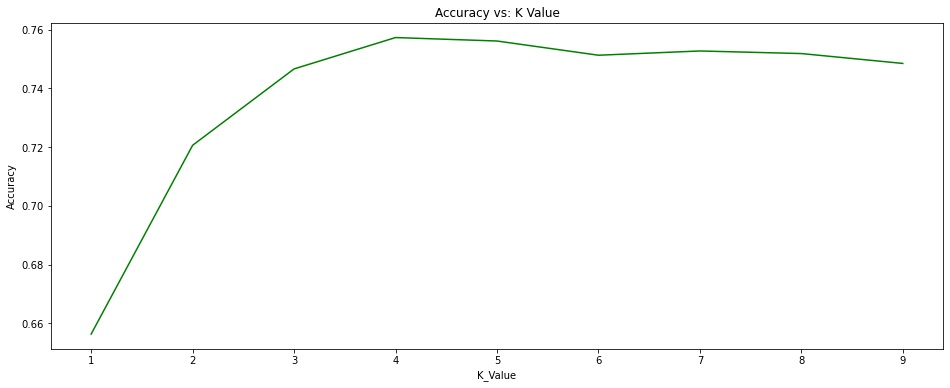

In [18]:
plt.figure(figsize =(16,6))
plt.plot(range(1,10),scores,color = 'green')
plt.title('Accuracy vs: K Value')
plt.xlabel('K_Value')
plt.ylabel('Accuracy')

In [29]:
best_knn = scores.index(max(scores))+1
knnmodel = KNeighborsRegressor(n_neighbors=best_knn)
knnmodel.fit(x_train, y_train) 
knn_pred = knnmodel.predict(x_val)
knnscore = knnmodel.score(x_val,y_val) #Gets the accuracy of our end result using .score
print(knnscore)

0.7573251461497978


In [30]:
R2= r2_score(y_val,knn_pred)
R2

0.7573251461497978